In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Bpendula/vcf_filtering/raw_SNP.vcf.gz', '/users/mcevoysu/scratch/output/Bpendula/scikit-allel/raw_SNP.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/Bpendula/scikit-allel/raw_SNP.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(581456,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=99.3M cbytes=22.2M cratio=4.5
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(371986,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 23,   9,  -1], [0.031   , 0.012   ,      nan], [b'T', b'A', b''], 728,  0.175, b'Contig0', 16605, -1, 3.0761, False, False, 2.14, b'.', 0.0421, [ 22,   9,  -1], [0.03    , 0.012   ,      nan], 60.  ,  0.   , 36189,  5.57, 4.28360e+03, [-1, -1], b'C',  0.582, 0.934, [0, 0, 0],  True, 2)
 ([  1,  -1,  -1], [0.001351,      nan,      nan], [b'C', b'', b''], 728,  0.962, b'Contig0', 16693, -1, 0.    , False, False, 0.  , b'.', 0.3746, [  1,  -1,  -1], [0.001351,      nan,      nan], 60.  ,  0.   , 36198, 15.16, 3.33470e+02, [-1, -1], b'T',  1.52 , 0.649, [0, 0, 0],  True, 1)
 ([478,  -1,  -1], [0.654   ,      nan,      nan], [b'G', b'', b''], 728, -0.043, b'Contig0', 17345, -1, 1.5801, False, False, 0.  , b'.', 0.0167, [492,  -1,  -1], [0.665   ,      nan,      nan], 60.  ,  0.   , 36209, 23.87, 3.72008e+05, [-1, -1], b'A', -0.128, 0.644, [0, 0, 0],  True, 1)
 ...
 ([  2,  -1,  -1], [0.002703,      nan,      nan], [b'T', b'', b''], 728,  0.544, b'Contig5225', 14215, -1, 0.0072, False, False, 0.  , b'.', 0.5005, [  3,  -1,  -1], [0.004054,      nan,      nan], 44.64,  0.   ,  1591,  3.8 , 8.74700e+01, [-1, -1], b'C', -0.598, 0.02 , [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.005405,      nan,      nan], [b'T', b'', b''], 728,  0.787, b'Contig5225', 13624, -1, 0.    , False, False, 0.  , b'.', 0.4908, [  4,  -1,  -1], [0.005405,      nan,      nan], 46.34, -1.907,  1602,  2.85, 1.68370e+02, [-1, -1], b'A', -0.666, 0.018, [0, 0, 0],  True, 1)
 ([  9,  -1,  -1], [0.014   ,      nan,      nan], [b'G', b'', b''], 728,  0.619, b'Contig5225', 13422, -1, 0.3378, False, False, 0.  , b'.', 0.4311, [ 13,  -1,  -1], [0.018   ,      nan,      nan], 49.17,  0.   ,  1604,  1.44, 6.18770e+02, [-1, -1], b'A',  0.134, 0.018, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(209470,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([ 1, -1, -1], [0.001351,      nan,      nan], [b'*', b'', b''], 728, -0.979, b'Contig0',  16619, -1, 0.    ,  True, False, 2.424, b'.',  0.3661, [ 1, -1, -1], [0.001351,      nan,      nan], 60.  ,  0.   , 36192,  0.  , 0.00000e+00, [-1, -1], b'T', -0.557, 0.158, [-1,  0,  0], False, 1)
 ([ 3, -1, -1], [0.004054,      nan,      nan], [b'*', b'', b''], 728,    nan, b'Contig0',  16752, -1, 0.0179,  True, False, 4.346, b'.',  0.3096, [ 2, -1, -1], [0.002703,      nan,      nan],   nan,    nan, 36207,  0.  , 0.00000e+00, [-1, -1], b'A',    nan, 0.288, [-1,  0,  0], False, 1)
 ([ 7,  3, -1], [0.009459, 0.004054,      nan], [b'G', b'*', b''], 728, -0.873, b'Contig0',  16787, -1, 0.2705, False, False, 6.649, b'.',  0.1539, [ 7,  2, -1], [0.009459, 0.002703,      nan], 60.  ,  0.   , 36208,  7.59, 2.20956e+03, [-1, -1], b'A', -0.718, 0.408, [ 0, -1,  0], False, 2)
 ...
 ([ 3,  3, -1], [0.004054, 0.004054,      nan], [b'A', b'*', b''], 728, -1.773, b'Contig5225', 106474, -1, 0.0889, False, False, 2.262, b'.', -0.0106, [ 2,  2, -1], [0.002703, 0.002703,      nan], 35.81,  0.526,  1184,  0.23, 6.63900e+01, [-1, -1], b'C',  0.202, 0.955, [ 0, -1,  0], False, 2)
 ([95,  2, -1], [0.128   , 0.002703,      nan], [b'T', b'*', b''], 728,  0.   , b'Contig5225',  58497, -1, 0.0016, False, False, 0.   , b'.',  0.1703, [97,  1, -1], [0.131   , 0.001351,      nan], 35.  , -1.661,  1314, 20.57, 8.31489e+04, [-1, -1], b'G',  0.684, 0.846, [ 0, -1,  0], False, 2)
 ([ 4, -1, -1], [0.00542 ,      nan,      nan], [b'*', b'', b''], 726,  0.   , b'Contig5225',  16743, -1, 0.0421,  True, False, 0.   , b'.',  0.4341, [ 5, -1, -1], [0.006775,      nan,      nan], 44.57, -1.162,  1541,  0.  , 6.00000e-02, [-1, -1], b'G', -0.673, 0.023, [-1,  0,  0], False, 1)]

## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 352414,  19039,    533])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

19572

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(352414,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  1,  -1,  -1], [0.001351,      nan,      nan], [b'C', b'', b''], 728,  0.962, b'Contig0', 16693, -1, 0.    , False, False, 0.   , b'.', 0.3746, [  1,  -1,  -1], [0.001351,      nan,      nan], 60.  ,  0.   , 36198, 15.16, 3.33470e+02, [-1, -1], b'T',  1.52 , 0.649, [0, 0, 0],  True, 1)
 ([478,  -1,  -1], [0.654   ,      nan,      nan], [b'G', b'', b''], 728, -0.043, b'Contig0', 17345, -1, 1.5801, False, False, 0.   , b'.', 0.0167, [492,  -1,  -1], [0.665   ,      nan,      nan], 60.  ,  0.   , 36209, 23.87, 3.72008e+05, [-1, -1], b'A', -0.128, 0.644, [0, 0, 0],  True, 1)
 ([ 23,  -1,  -1], [0.031   ,      nan,      nan], [b'T', b'', b''], 728,  0.66 , b'Contig0', 17175, -1, 1.5489, False, False, 1.013, b'.', 0.0582, [ 21,  -1,  -1], [0.028   ,      nan,      nan], 60.  ,  0.   , 36221,  3.82, 2.40602e+03, [-1, -1], b'A',  0.353, 0.871, [0, 0, 0],  True, 1)
 ...
 ([  2,  -1,  -1], [0.002703,      nan,      nan], [b'T', b'', b''], 728,  0.544, b'Contig5225', 14215, -1, 0.0072, False, False, 0.   , b'.', 0.5005, [  3,  -1,  -1], [0.004054,      nan,      nan], 44.64,  0.   ,  1591,  3.8 , 8.74700e+01, [-1, -1], b'C', -0.598, 0.02 , [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.005405,      nan,      nan], [b'T', b'', b''], 728,  0.787, b'Contig5225', 13624, -1, 0.    , False, False, 0.   , b'.', 0.4908, [  4,  -1,  -1], [0.005405,      nan,      nan], 46.34, -1.907,  1602,  2.85, 1.68370e+02, [-1, -1], b'A', -0.666, 0.018, [0, 0, 0],  True, 1)
 ([  9,  -1,  -1], [0.014   ,      nan,      nan], [b'G', b'', b''], 728,  0.619, b'Contig5225', 13422, -1, 0.3378, False, False, 0.   , b'.', 0.4311, [ 13,  -1,  -1], [0.018   ,      nan,      nan], 49.17,  0.   ,  1604,  1.44, 6.18770e+02, [-1, -1], b'A',  0.134, 0.018, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

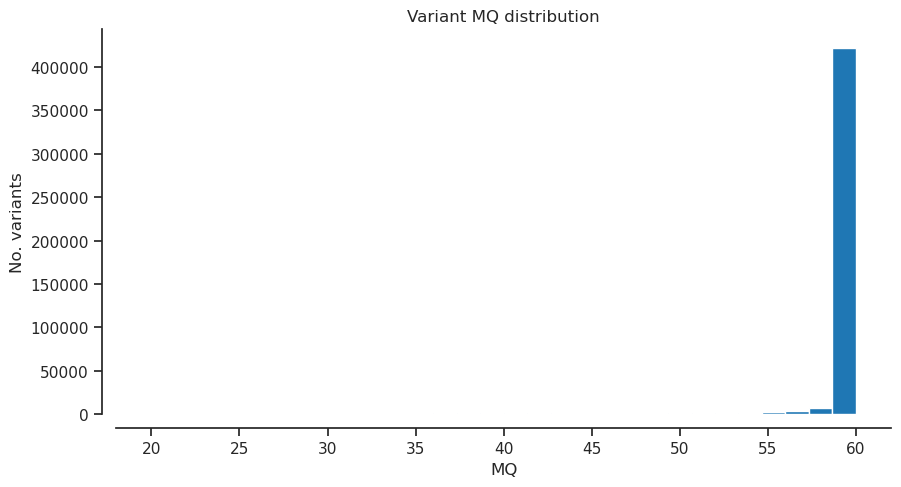

In [14]:
plot_hist('MQ','var') # RMS mapping quality

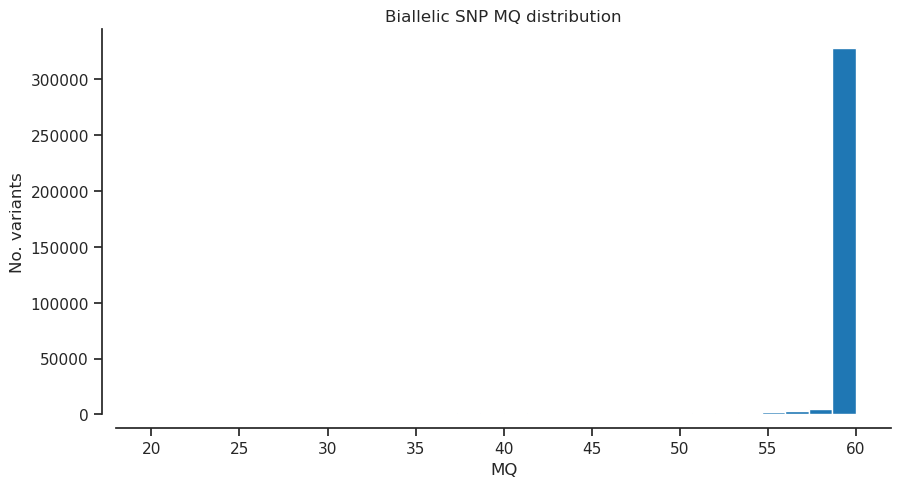

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

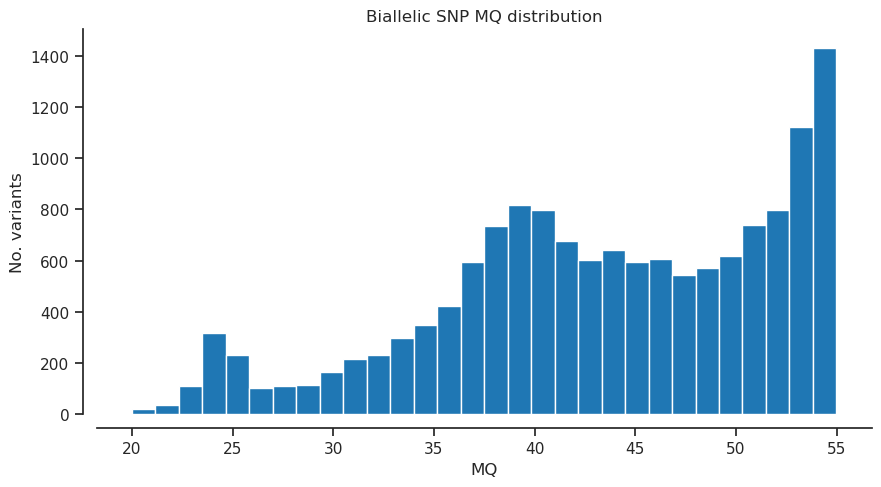

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

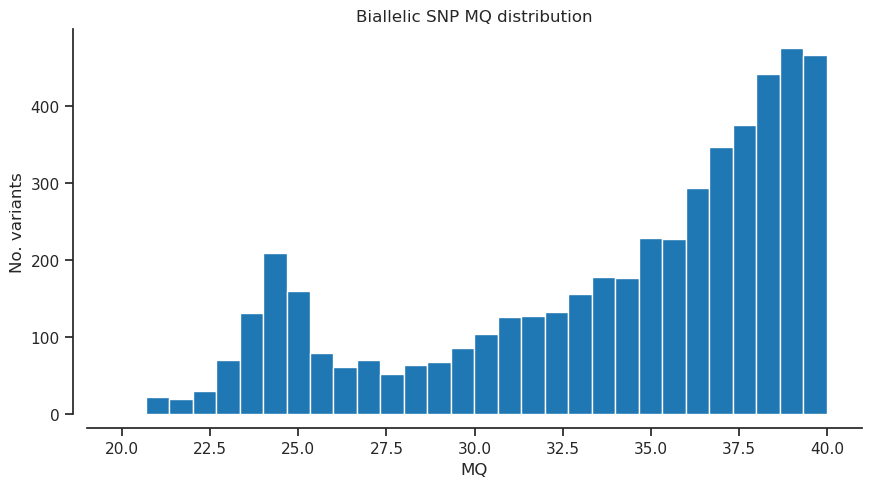

In [19]:
plot_hist('MQ')

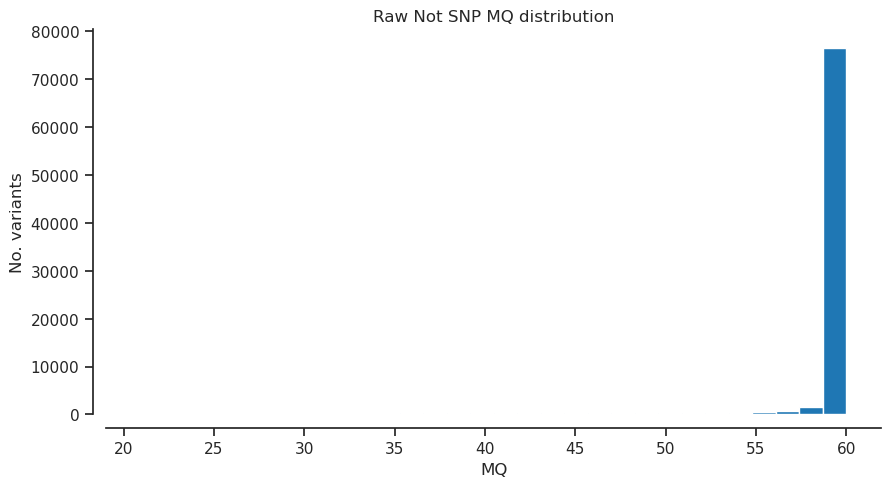

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

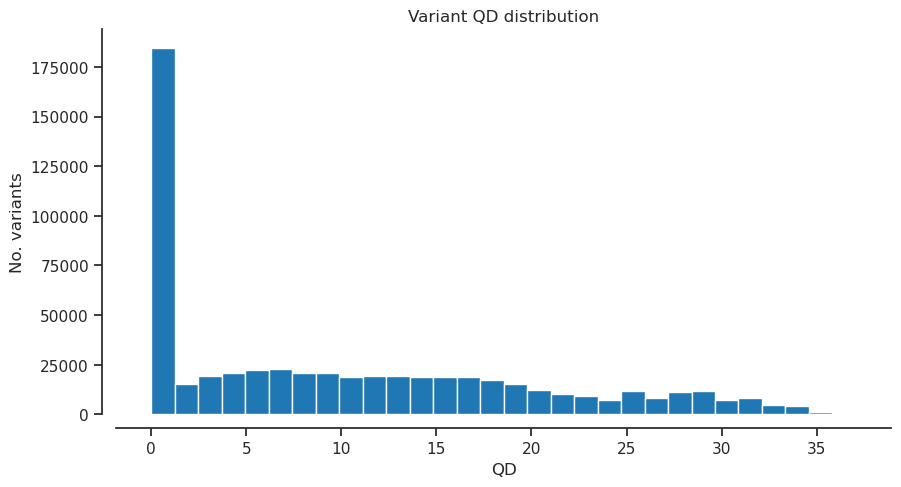

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

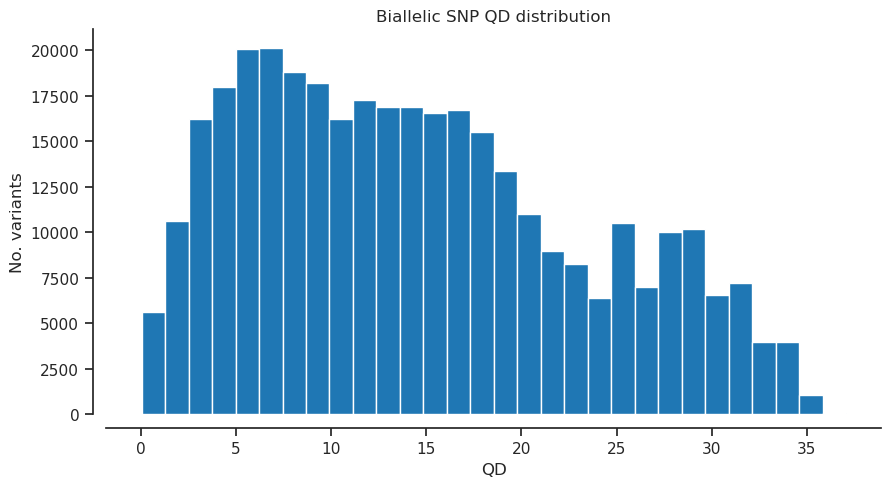

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

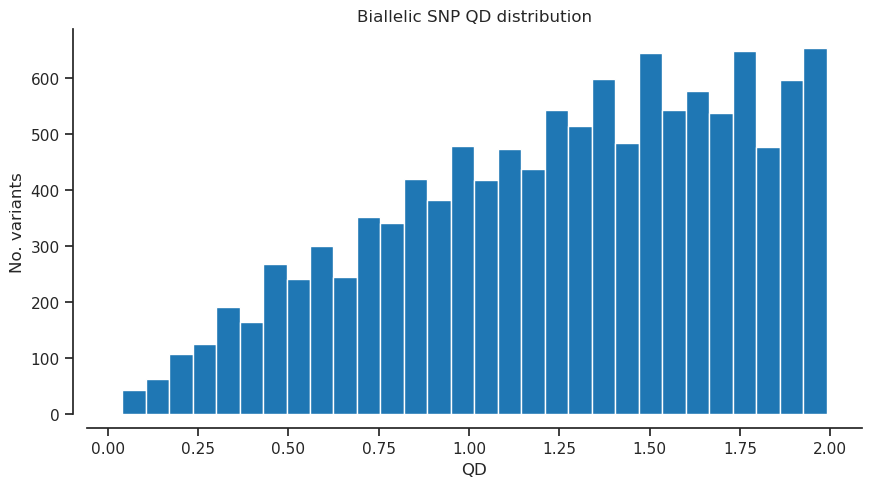

In [24]:
plot_hist('QD')

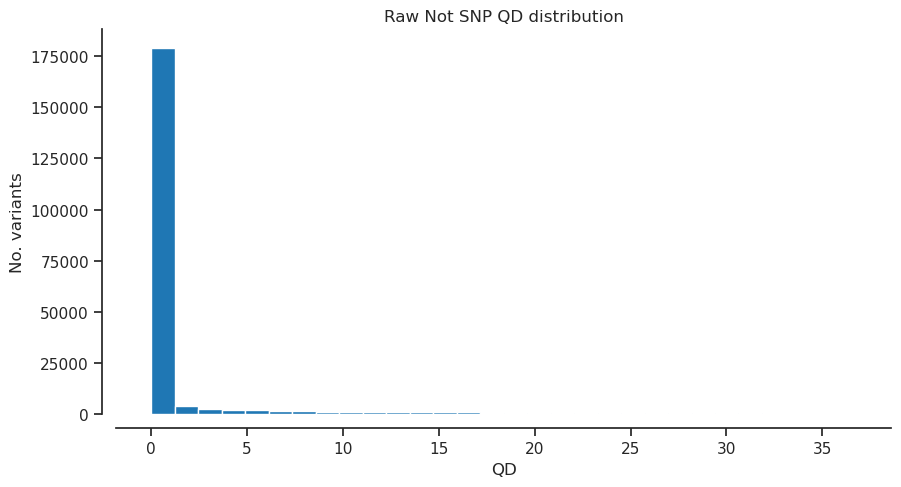

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

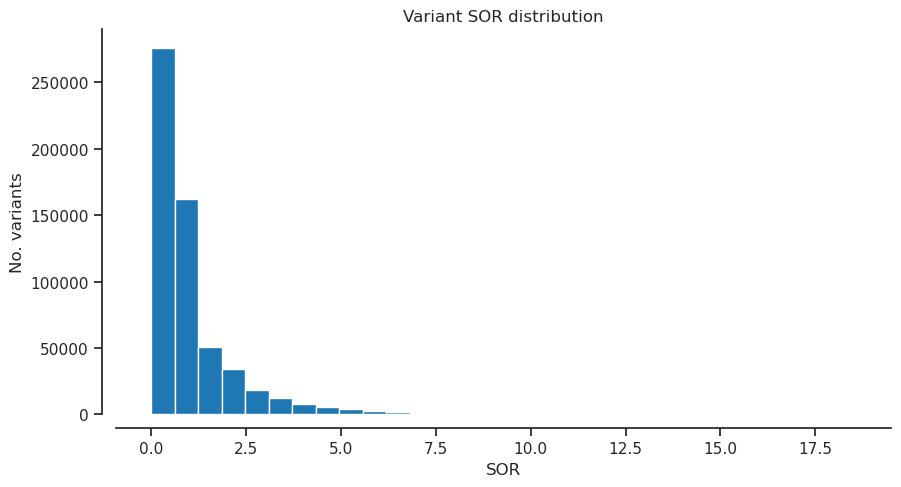

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

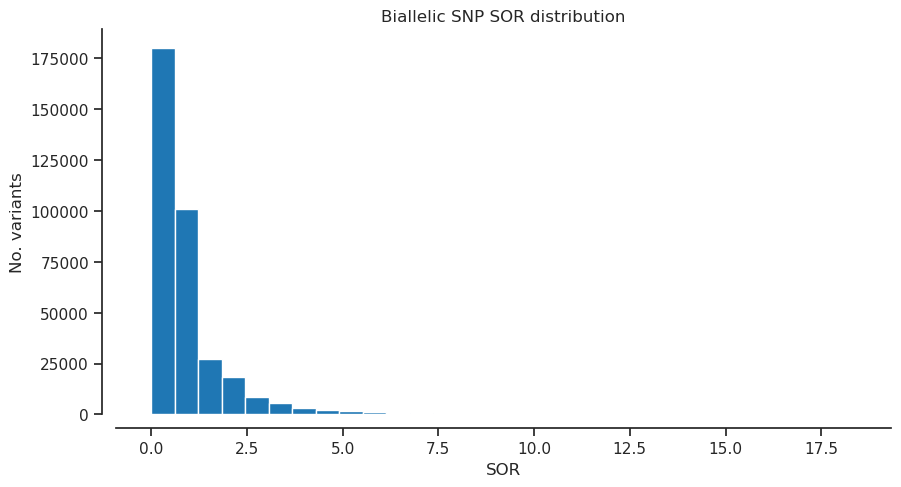

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

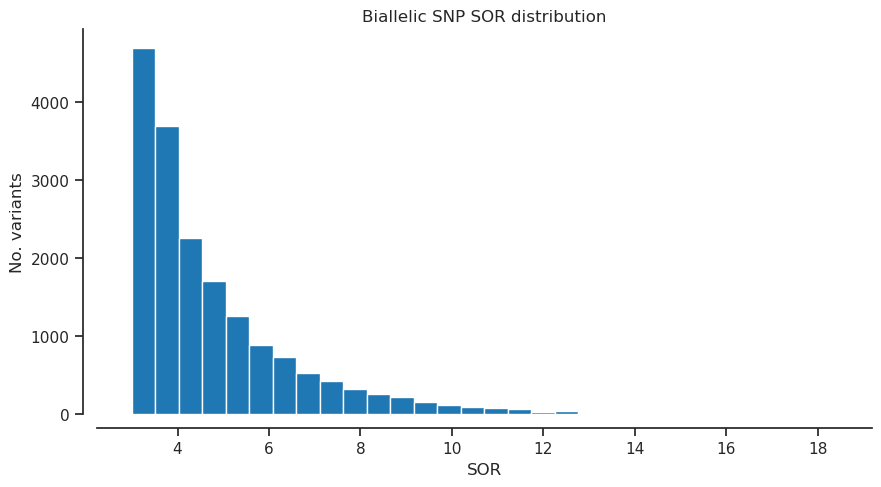

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

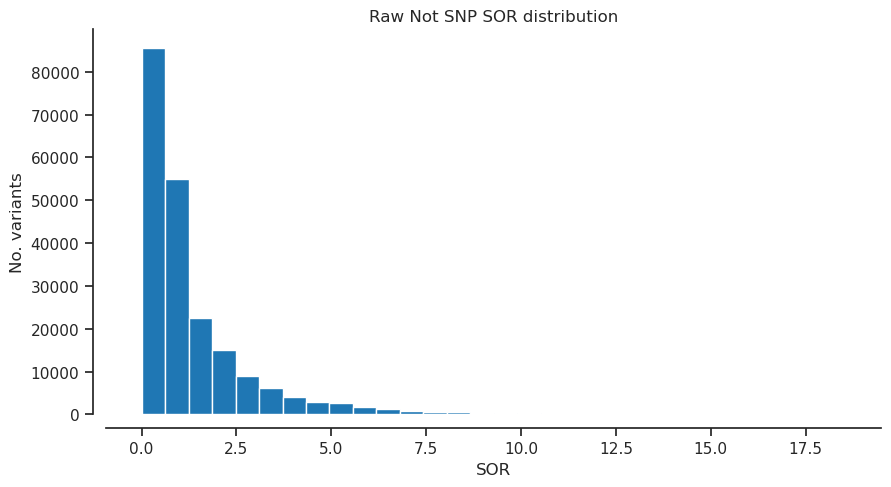

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

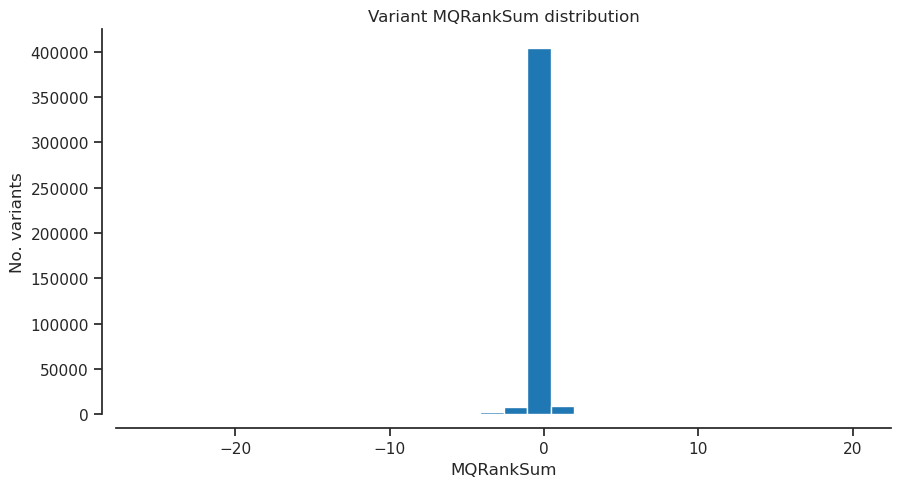

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

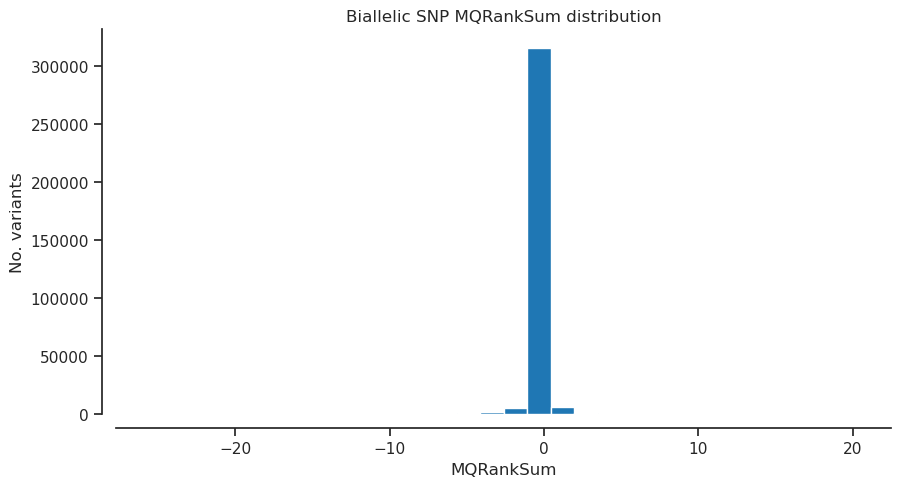

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

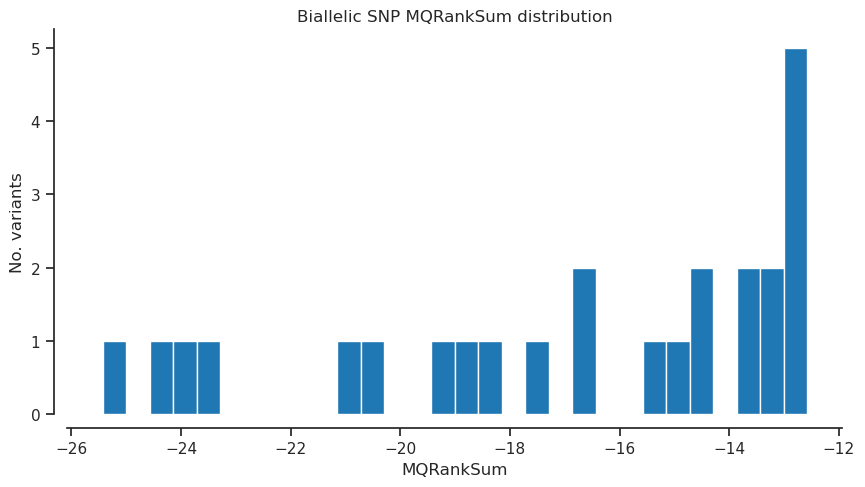

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

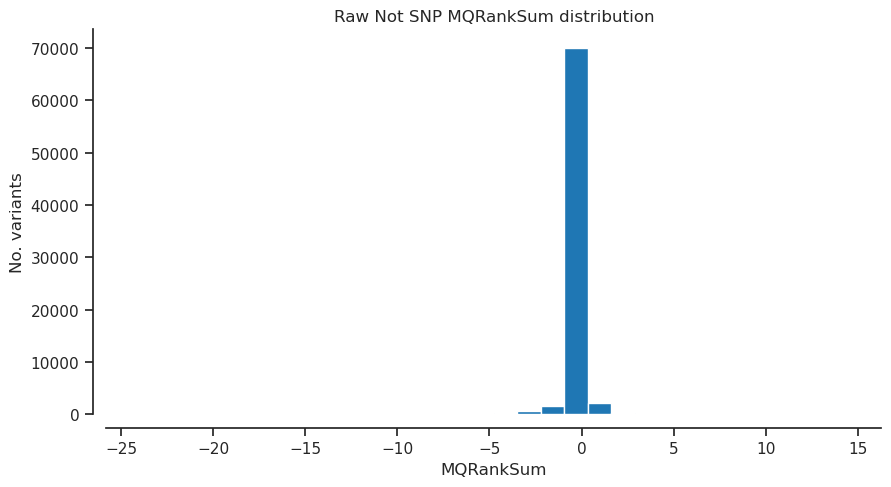

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

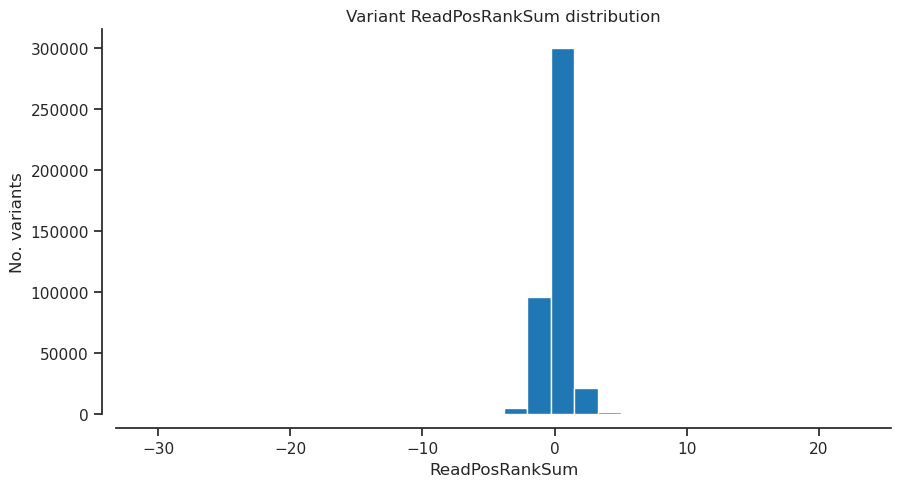

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

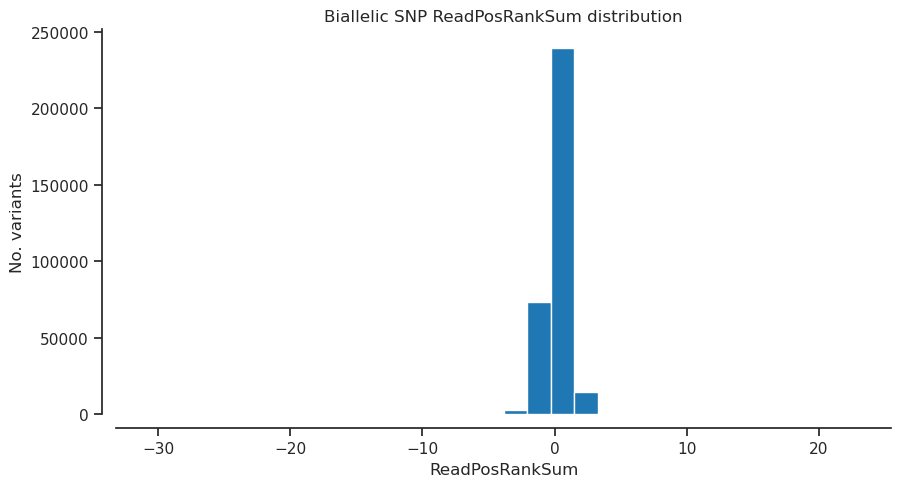

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

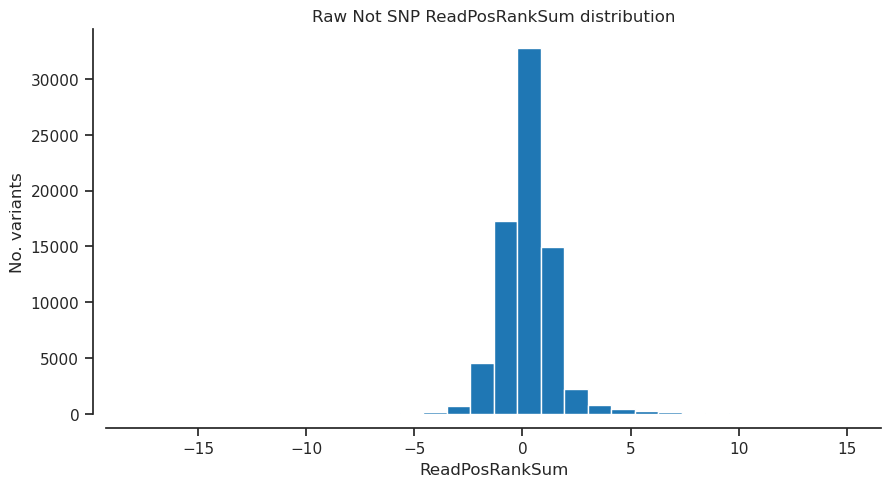

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

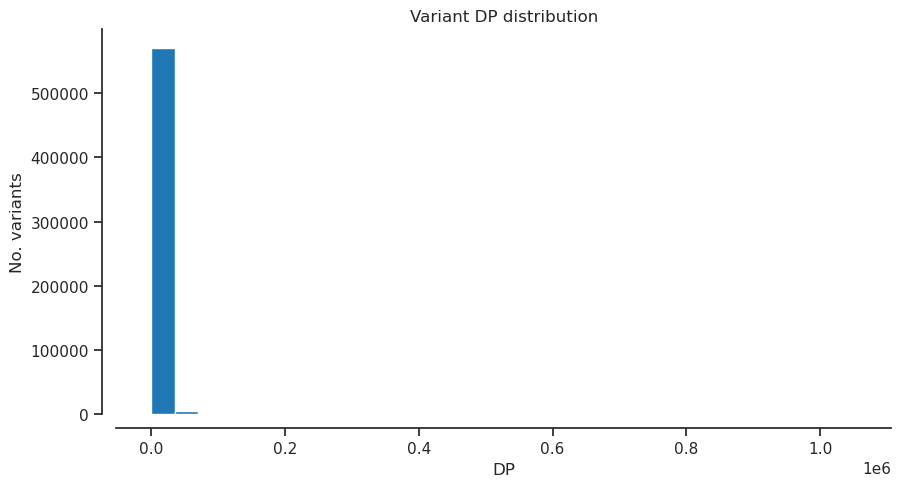

In [39]:
plot_hist('DP','var')

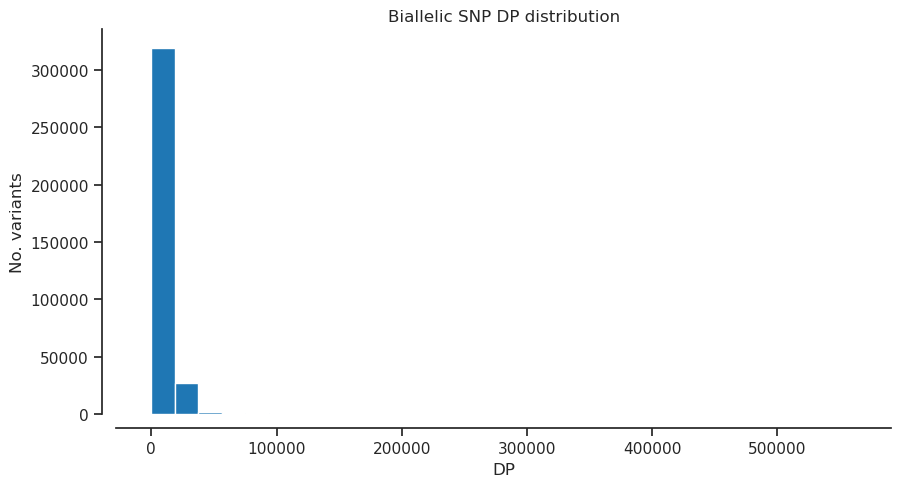

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

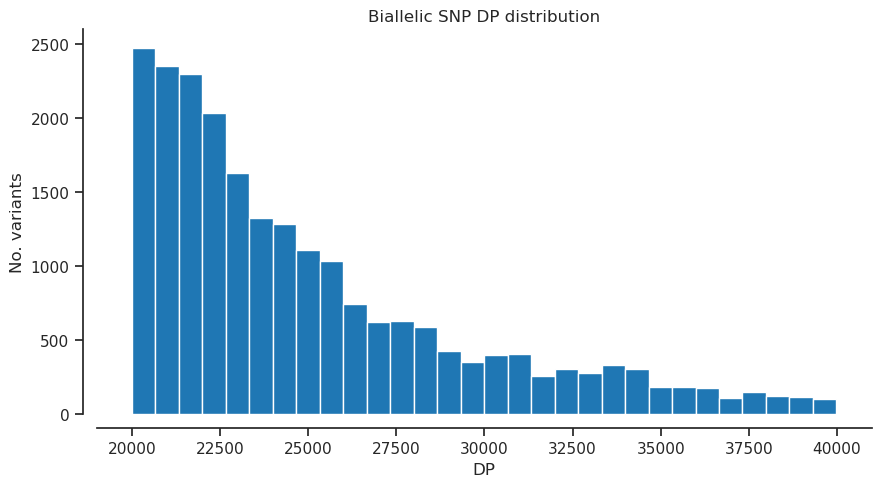

In [42]:
plot_hist('DP')

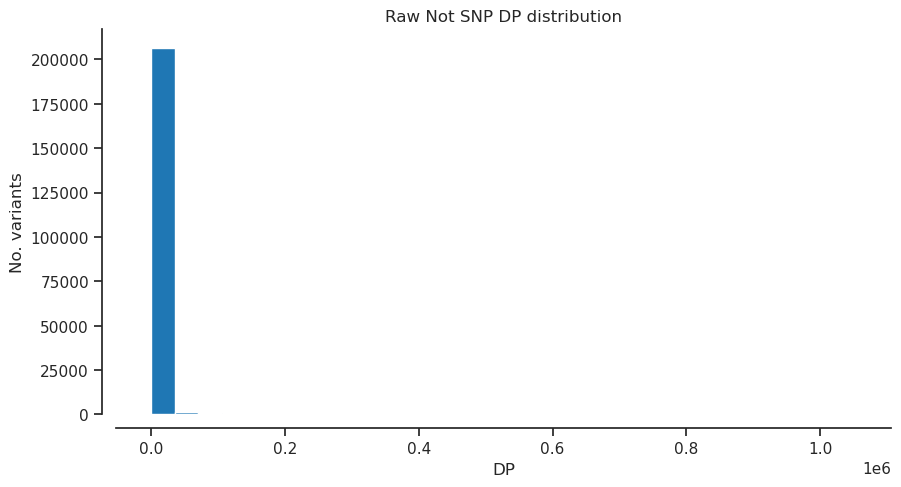

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

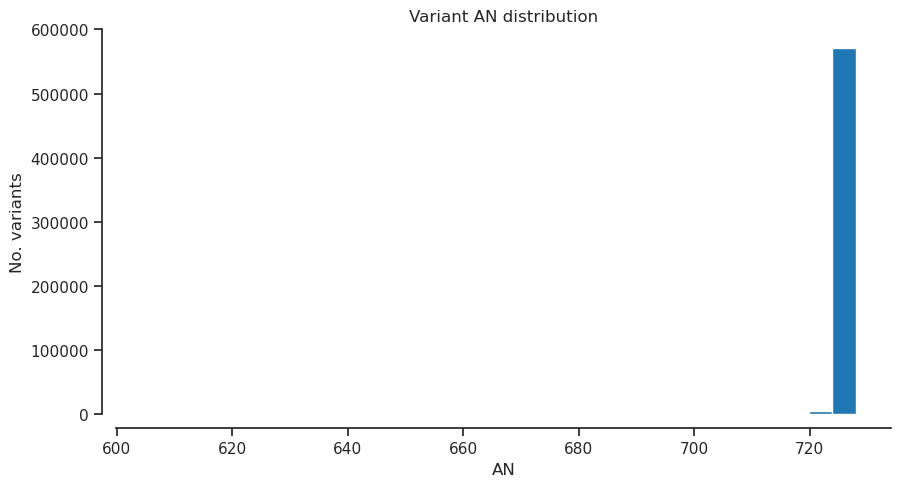

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

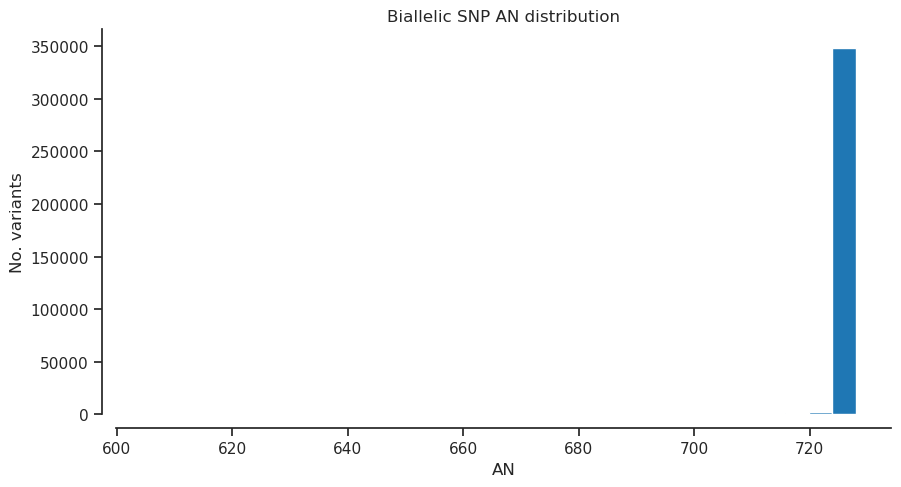

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

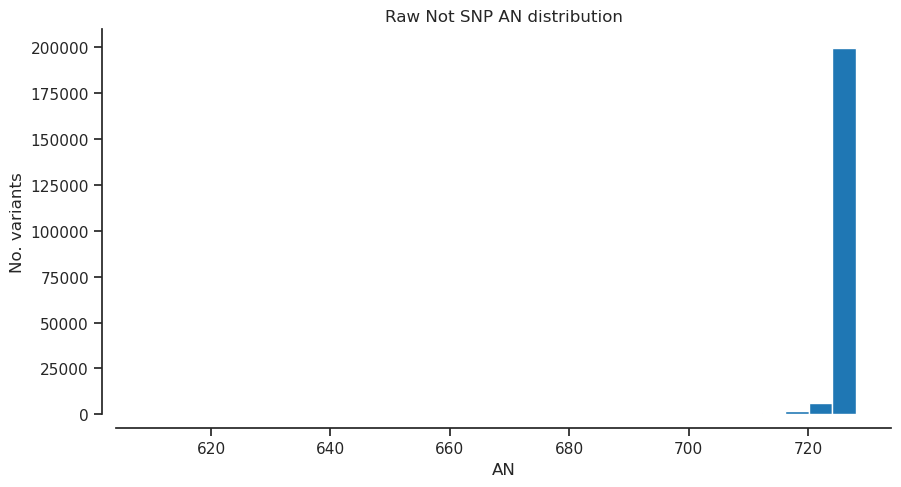

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

335876

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(581456, 364, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=403.7M cbytes=17.9M cratio=22.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(335876, 364, 2) dtype=int8 chunks=(2625, 364, 2)
   nbytes=233.2M cbytes=18.4M cratio=12.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(335876, 4) dtype=int32 chunks=(20993, 4)
   nbytes=5.1M cbytes=792.5K cratio=6.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(335876, 4) dtype=int32>
696  23   9   0
727   1   0   0
250 478   0   0
...
726   2   0   0
726   2   0   0
724   4   0   0

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[727,   1],
       [250, 478],
       [705,  23],
       ...,
       [726,   2],
       [726,   2],
       [724,   4]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

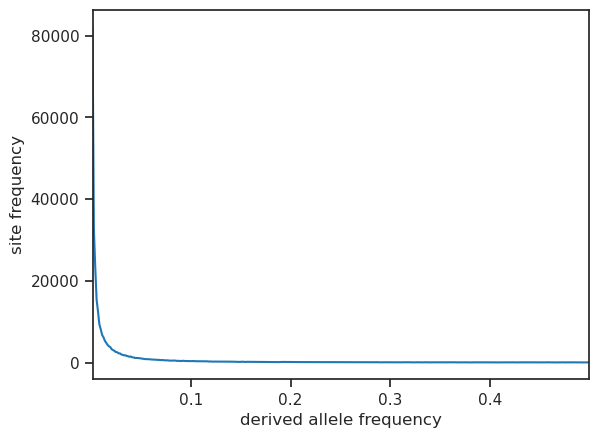

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(335876,) dtype=bool chunks=(167938,)
   nbytes=328.0K cbytes=68.4K cratio=4.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(316299, 364, 2) dtype=int8 chunks=(2472, 364, 2)
   nbytes=219.6M cbytes=16.5M cratio=13.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

316299

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [59]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'ESP00102-001',
 b'ESP00102-002',
 b'ESP00102-003',
 b'ESP00102-004',
 b'ESP00102-005',
 b'ESP00102-006',
 b'ESP00102-007',
 b'ESP00102-008',
 b'ESP00102-009',
 b'ESP00102-010',
 b'ESP00102-011',
 b'ESP00102-012',
 b'ESP00102-013',
 b'ESP00102-014',
 b'ESP00102-015',
 b'ESP00102-016',
 b'ESP00102-017',
 b'ESP00102-018',
 b'ESP00102-019',
 b'ESP00102-020',
 b'ESP00102-021',
 b'ESP00102-022',
 b'ESP00102-023',
 b'ESP00102-024',
 b'ESP00102-025',
 b'ESP00199-001',
 b'ESP00199-002',
 b'ESP00199-003',
 b'ESP00199-004',
 b'ESP00199-005',
 b'ESP00199-006',
 b'ESP00199-007',
 b'ESP00199-008',
 b'ESP00199-009',
 b'ESP00199-010',
 b'ESP00199-011',
 b'ESP00199-012',
 b'ESP00199-013',
 b'ESP00199-014',
 b'ESP00199-015',
 b'ESP00199-016',
 b'ESP00199-017',
 b'ESP00199-018',
 b'ESP00199-019',
 b'ESP00199-020',
 b'ESP00199-021',
 b'ESP00199-022',
 b'ESP00199-023',
 b'ESP00199-024',
 b'ESP00199-025',
 b'ESP00337-001',
 b'ESP00337-002',
 b'ESP00337-003',
 b'ESP00337-004',
 b'ESP00337-005',
 b'ESP0033

In [64]:
samples_fn = '~/scratch/data/Bpendula/Betula_pendula_sample_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,ESP00102-001,ESP00102
1,ESP00102-002,ESP00102
2,ESP00102-003,ESP00102
3,ESP00102-004,ESP00102
4,ESP00102-005,ESP00102
...,...,...
359,SWE00093-021,SWE00093
360,SWE00093-022,SWE00093
361,SWE00093-023,SWE00093
362,SWE00093-024,SWE00093


In [65]:
samples.Population.value_counts()

Population
ESP00102    25
ESP00199    25
ESP00337    25
FIN00015    25
FIN00020    25
FIN00046    25
ITA00243    25
NLD00013    25
SWE00093    25
LUX00021    25
FIN00044    24
GBR00015    24
GBR00013    23
ITA00248    23
IRL00017    20
Name: count, dtype: int64

In [66]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['ESP00102', 'ESP00199', 'ESP00337', 'FIN00015', 'FIN00020',
       'FIN00044', 'FIN00046', 'GBR00013', 'GBR00015', 'IRL00017',
       'ITA00243', 'ITA00248', 'LUX00021', 'NLD00013', 'SWE00093'],
      dtype=object)

## Gt frequency function

In [67]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 15)
    pop2color = {'ESP00102': palette[0],
                 'ESP00199': palette[8],
                 'ESP00337': palette[1],
                 'FIN00015': palette[9],
                 'FIN00020': palette[2],
                 'FIN00044': palette[10],
                 'FIN00046': palette[3],
                 'GBR00013': palette[11],
                 'GBR00015': palette[4],
                 'IRL00017': palette[12],
                 'ITA00243': palette[5],
                 'ITA00248': palette[13],
                 'LUX00021': palette[6],
                 'NLD00013': palette[14],
                 'SWE00093': palette[7]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[7])]
    ax.legend(handles=handles, labels=['ESP00102', 'ESP00199', 'ESP00337', 'FIN00015', 'FIN00020',
       'FIN00044', 'FIN00046', 'GBR00013', 'GBR00015', 'IRL00017',
       'ITA00243', 'ITA00248', 'LUX00021', 'NLD00013', 'SWE00093'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

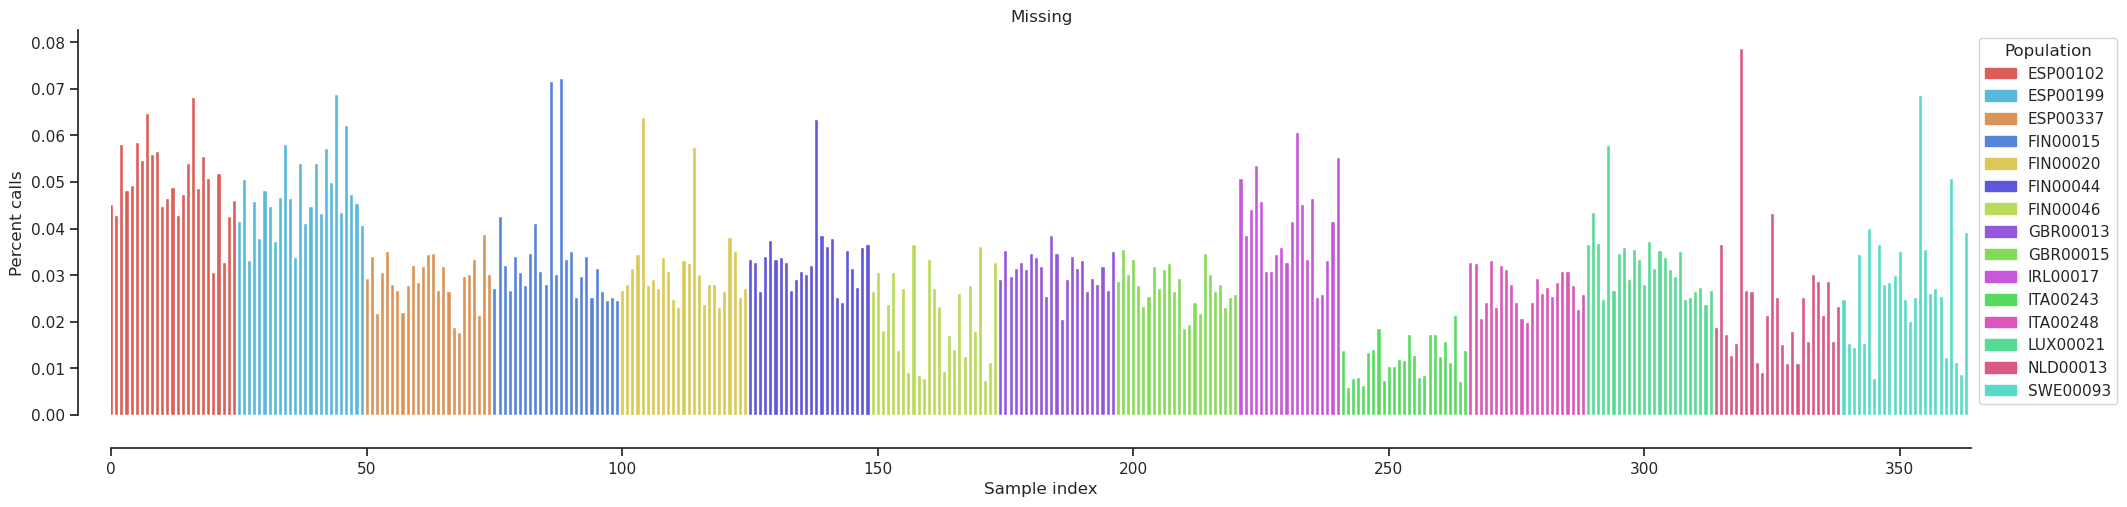

In [68]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

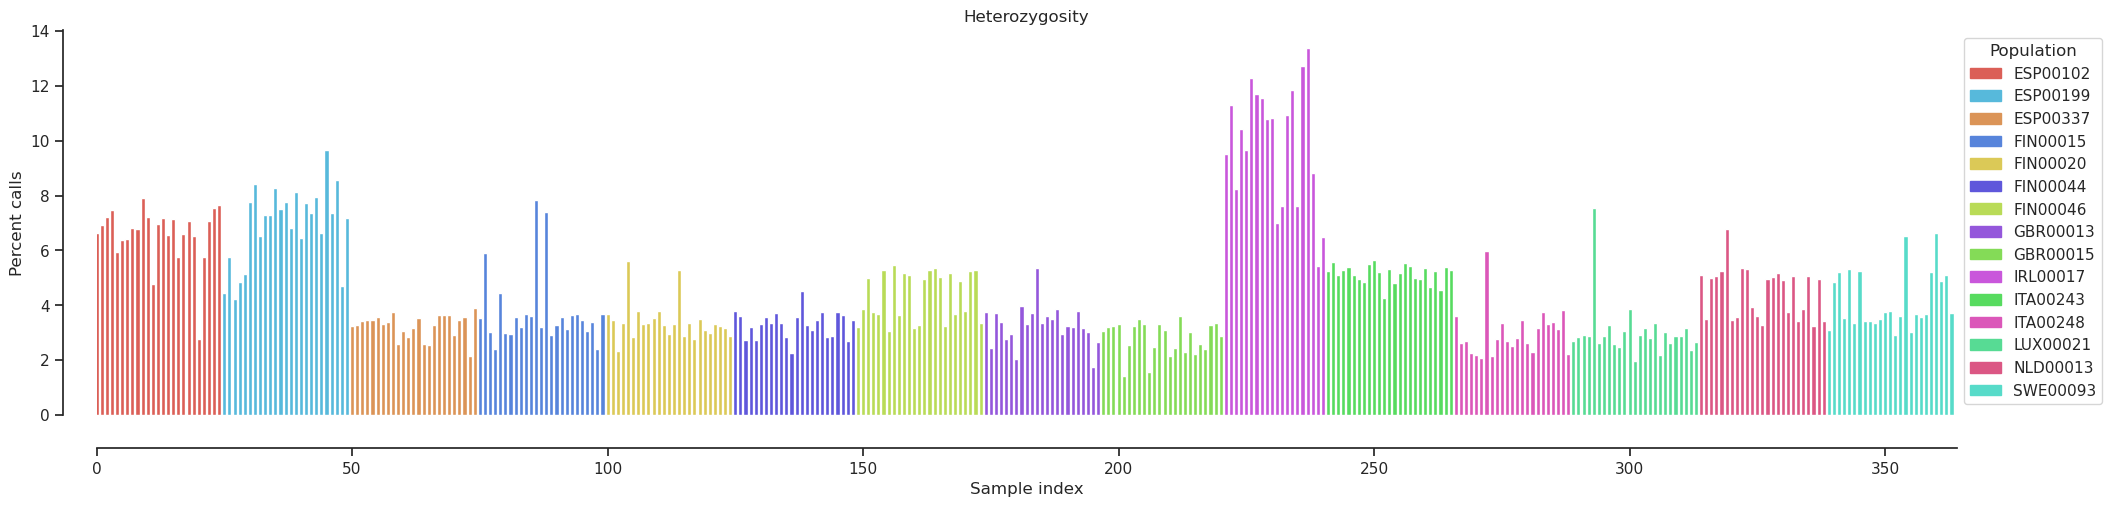

In [69]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [70]:
palette = sns.color_palette("hls",15)
pop_colours = {    
                'ESP00102': palette[0],
                 'ESP00199': palette[8],
                 'ESP00337': palette[1],
                 'FIN00015': palette[9],
                 'FIN00020': palette[2],
                 'FIN00044': palette[10],
                 'FIN00046': palette[3],
                 'GBR00013': palette[11],
                 'GBR00015': palette[4],
                 'IRL00017': palette[12],
                 'ITA00243': palette[5],
                 'ITA00248': palette[13],
                 'LUX00021': palette[6],
                 'NLD00013': palette[14],
                 'SWE00093': palette[7]
}

In [71]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [72]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(316299, 2) dtype=int32 chunks=(39538, 2)
   nbytes=2.4M cbytes=597.6K cratio=4.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [73]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(234060, 364) dtype=int8 chunks=(3658, 364)
   nbytes=81.3M cbytes=11.1M cratio=7.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [74]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

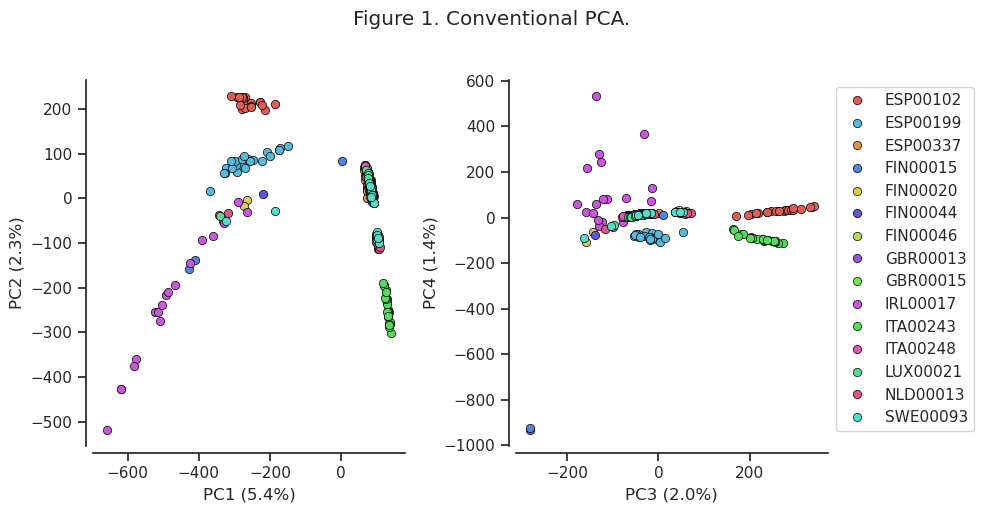

In [75]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [83]:
outliers = coords1[:,3]<-800
samples[outliers]

,ID,Population
86,FIN00015-012,FIN00015
88,FIN00015-014,FIN00015


In [84]:
pc_het[outliers]

array([7.83815314, 7.40818023])

In [85]:
pc_missing[outliers]

array([0.07176754, 0.07239985])